In [117]:
def myplot(score,coeff,labels=None, marker_labels = None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    fig, ax = plt.subplots(figsize=(28,28))
    ax.scatter(xs * scalex,ys * scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.05, coeff[i,1] * 1.05, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center',fontsize=12)
        else:
            plt.text(coeff[i,0]* 1.05, coeff[i,1] * 1.05, labels[i], color = 'g', ha = 'center', va = 'center',fontsize=25)

    if marker_labels is not None:
        for i, txt in enumerate(marker_labels):
            ax.annotate(txt, (xs[i]* scalex, scaley * ys[i]), fontsize=20)


    plt.xlim(-.6,.6)
    plt.ylim(-.6,.7)
    plt.xlabel("PC{}".format(1),fontsize=20)
    plt.ylabel("PC{}".format(2),fontsize=20)

    plt.grid()

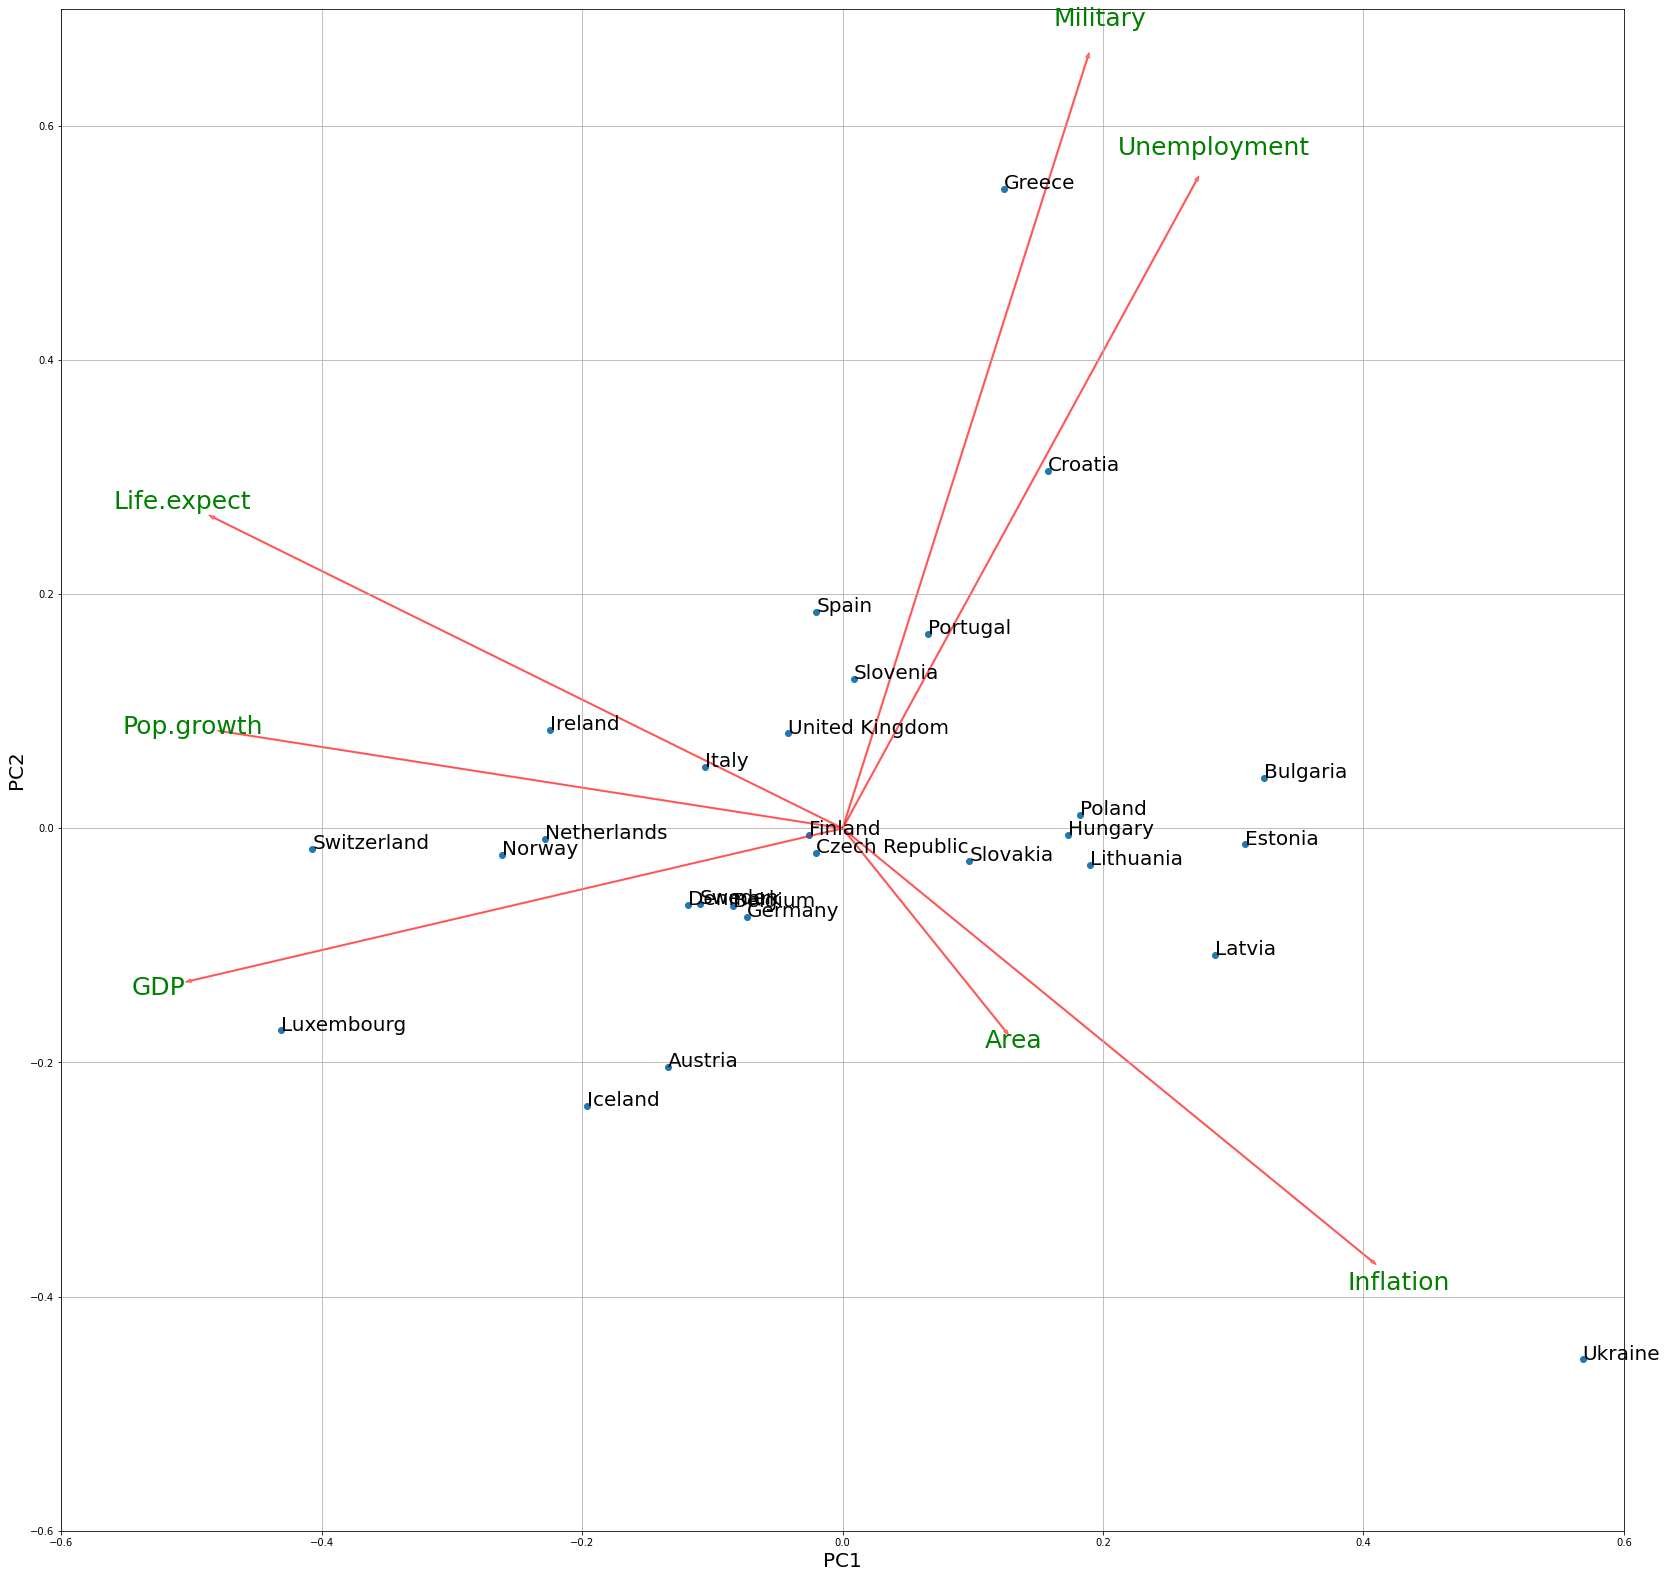

In [118]:
from _csv import reader
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


with open('europe.csv', 'r') as read_obj:
    csv_reader = reader(read_obj)
    data = np.array(list(csv_reader)[1:]).T[1:].T

feature_names = ["Area","GDP","Inflation","Life.expect","Military","Pop.growth","Unemployment"] # without country
countries = ["Austria", "Belgium", "Bulgaria", "Croatia",
                 "Czech Republic", "Denmark", "Estonia", "Finland",
                 "Germany", "Greece", "Hungary", "Iceland", "Ireland",
                 "Italy", "Latvia", "Lithuania", "Luxembourg", "Netherlands",
                 "Norway", "Poland", "Portugal", "Slovakia", "Slovenia",
                 "Spain", "Sweden", "Switzerland", "Ukraine", "United Kingdom"
                 ]

standard_scaler = StandardScaler()

standard_scaler.fit(data)
scaled_data = standard_scaler.transform(data)

pca = PCA(n_components=5)
pca.fit(scaled_data)
x = pca.transform(scaled_data)

myplot(x[:,0:2],np.transpose(pca.components_[0:2, :]),feature_names, marker_labels=countries)
plt.show()




